<a href="https://colab.research.google.com/github/Zack445/CSC-521/blob/main/W9_Zachary_Mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quick Sort

In [1]:
def quick_sort(arr, depth=0):
    # Base case: If the array has 1 or 0 elements, it is already sorted
    if len(arr) <= 1:
        return arr
    else:
        # Choosing the last element as the pivot
        pivot = arr[-1]
        # Elements less than the pivot
        left = [x for x in arr[:-1] if x <= pivot]
        # Elements greater than the pivot
        right = [x for x in arr[:-1] if x > pivot]

        # Print the array at the current depth level of recursion
        print(f"Depth {depth}: {arr}, Pivot: {pivot}")

        # Recursively sort left and right, then combine
        return quick_sort(left, depth + 1) + [pivot] + quick_sort(right, depth + 1)

# Example array
arr = [9, 7, 5, 11, 12]

# Sorting the array using Quick Sort
sorted_arr = quick_sort(arr)

# Print the final result
print("Sorted array:", sorted_arr)

Depth 0: [9, 7, 5, 11, 12], Pivot: 12
Depth 1: [9, 7, 5, 11], Pivot: 11
Depth 2: [9, 7, 5], Pivot: 5
Depth 3: [9, 7], Pivot: 7
Sorted array: [5, 7, 9, 11, 12]


Merge Sort

In [2]:
def merge_sort(arr):
    # Helper function to merge two sorted subarrays into a single sorted array
    def merge(left, right):
        sorted_array = []  # This will hold the merged sorted array
        i = j = 0  # Pointers for the left and right subarrays

        # Merge the two arrays while there are elements in both
        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
                sorted_array.append(left[i])  # Append the smaller element
                i += 1  # Move pointer in the left array
            else:
                sorted_array.append(right[j])  # Append the smaller element
                j += 1  # Move pointer in the right array

        # Append any remaining elements from the left array
        sorted_array.extend(left[i:])
        # Append any remaining elements from the right array
        sorted_array.extend(right[j:])

        return sorted_array

    # Base case: a list of zero or one element is already sorted
    if len(arr) <= 1:
        return arr

    # Divide the array into two halves
    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid])  # Recursively sort the left half
    right_half = merge_sort(arr[mid:])  # Recursively sort the right half

    # Merge the two sorted halves
    merged_array = merge(left_half, right_half)

    # Print the intermediate steps for debugging and visualization
    print(f"Left half: {left_half}")
    print(f"Right half: {right_half}")
    print(f"Merged array: {merged_array}")
    print("")

    return merged_array

# Example array to be sorted
array = [38, 21, 27, 43, 3, 9, 12, 14]

# Print the initial array
print(f"Initial array: {array}\n")

# Perform merge sort on the example array
sorted_array = merge_sort(array)

# Print the final sorted array
print(f"\nSorted array: {sorted_array}")

Initial array: [38, 21, 27, 43, 3, 9, 12, 14]

Left half: [38]
Right half: [21]
Merged array: [21, 38]

Left half: [27]
Right half: [43]
Merged array: [27, 43]

Left half: [21, 38]
Right half: [27, 43]
Merged array: [21, 27, 38, 43]

Left half: [3]
Right half: [9]
Merged array: [3, 9]

Left half: [12]
Right half: [14]
Merged array: [12, 14]

Left half: [3, 9]
Right half: [12, 14]
Merged array: [3, 9, 12, 14]

Left half: [21, 27, 38, 43]
Right half: [3, 9, 12, 14]
Merged array: [3, 9, 12, 14, 21, 27, 38, 43]


Sorted array: [3, 9, 12, 14, 21, 27, 38, 43]


Dijkstra Algorithm

In [7]:
import heapq
import pandas as pd

def dijkstra(graph, start):
    """
    Implements Dijkstra's algorithm to find the shortest path in a graph.

    Parameters:
    graph (dict): A dictionary where keys are nodes and values are lists of tuples (neighbor, weight).
    start (str): The starting node for Dijkstra's algorithm.

    Returns:
    tuple: A dictionary of shortest distances and a dictionary of previous nodes.
    """
    # Priority queue to store (distance, node)
    priority_queue = []
    heapq.heappush(priority_queue, (0, start))

    # Dictionary to store the shortest path to each node
    shortest_paths = {node: float('inf') for node in graph}
    shortest_paths[start] = 0

    # Dictionary to store the previous node in the shortest path
    previous_nodes = {node: None for node in graph}

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        # Skip processing if we already found a shorter path
        if current_distance > shortest_paths[current_node]:
            continue

        # Process each neighbor of the current node
        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight

            # If a shorter path is found
            if distance < shortest_paths[neighbor]:
                shortest_paths[neighbor] = distance
                previous_nodes[neighbor] = current_node  # Track the previous node
                heapq.heappush(priority_queue, (distance, neighbor))

    return shortest_paths, previous_nodes

def display_as_dataframe(shortest_paths, previous_nodes):
    """
    Displays the shortest path results as a pandas DataFrame.

    Parameters:
    shortest_paths (dict): A dictionary where keys are nodes and values are the shortest distance from the start node.
    previous_nodes (dict): A dictionary where keys are nodes and values are the previous node in the shortest path.

    Returns:
    pd.DataFrame: DataFrame with columns for node, shortest distance, and previous node.
    """
    data = {
        'Node': list(shortest_paths.keys()),
        'Shortest Distance': list(shortest_paths.values()),
        'Previous Node': [previous_nodes[node] for node in shortest_paths]
    }

    df = pd.DataFrame(data)
    return df

# Example graph
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}

# Find shortest paths from node 'A'
start_node = 'A'
shortest_paths, previous_nodes = dijkstra(graph, start_node)

# Display results as DataFrame
df = display_as_dataframe(shortest_paths, previous_nodes)
print(f"Shortest paths from node {start_node}:")
df

Shortest paths from node A:


,Node,Shortest Distance,Previous Node
0,A,0,None
1,B,1,A
2,C,3,B
3,D,4,C


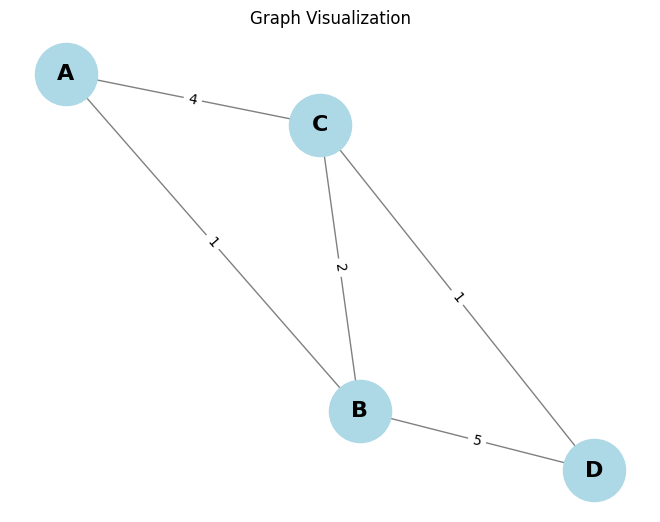

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph object
G = nx.Graph()

# Add edges to the graph with weights
edges = [
    ('A', 'B', 1),
    ('A', 'C', 4),
    ('B', 'C', 2),
    ('B', 'D', 5),
    ('C', 'D', 1)
]
G.add_weighted_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # Position the nodes using the spring layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

# Save the graph to a PNG file
plt.title("Graph Visualization")
plt.savefig("graph.png")

# Display the graph
plt.show()

Binary Tree Traversal

In [8]:
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

# In-Order Traversal
def in_order_traversal(root):
    if root:
        in_order_traversal(root.left)
        print(root.val, end=" ")
        in_order_traversal(root.right)

# Pre-Order Traversal
def pre_order_traversal(root):
    if root:
        print(root.val, end=" ")
        pre_order_traversal(root.left)
        pre_order_traversal(root.right)

# Post-Order Traversal
def post_order_traversal(root):
    if root:
        post_order_traversal(root.left)
        post_order_traversal(root.right)
        print(root.val, end=" ")

# Create the Binary Tree
root = Node(4)
root.left = Node(2)
root.right = Node(6)
root.left.left = Node(1)
root.left.right = Node(3)
root.right.left = Node(5)
root.right.right = Node(7)

# Print Traversals
print("In-Order Traversal: ")
in_order_traversal(root)

print("\nPre-Order Traversal: ")
pre_order_traversal(root)

print("\nPost-Order Traversal: ")
post_order_traversal(root)

In-Order Traversal: 
1 2 3 4 5 6 7 
Pre-Order Traversal: 
4 2 1 3 6 5 7 
Post-Order Traversal: 
1 3 2 5 7 6 4 